In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

stock_data = pd.read_csv('/content/NFLX.csv', index_col='Date')
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-27,327.549988,336.440002,324.410004,327.660004,327.660004,8625800
2023-03-28,326.059998,333.320007,321.279999,323.519989,323.519989,6489400
2023-03-29,326.290009,332.850006,325.730011,332.029999,332.029999,6287300
2023-03-30,340.269989,343.290009,335.299988,338.429993,338.429993,7131500
2023-03-31,340.049988,345.839996,337.200012,345.480011,345.480011,5610200
...,...,...,...,...,...,...
2024-03-20,619.950012,629.510010,618.340027,627.690002,627.690002,2639500
2024-03-21,630.650024,634.359985,622.330017,622.710022,622.710022,2507700
2024-03-22,624.159973,629.049988,621.000000,628.010010,628.010010,2134100


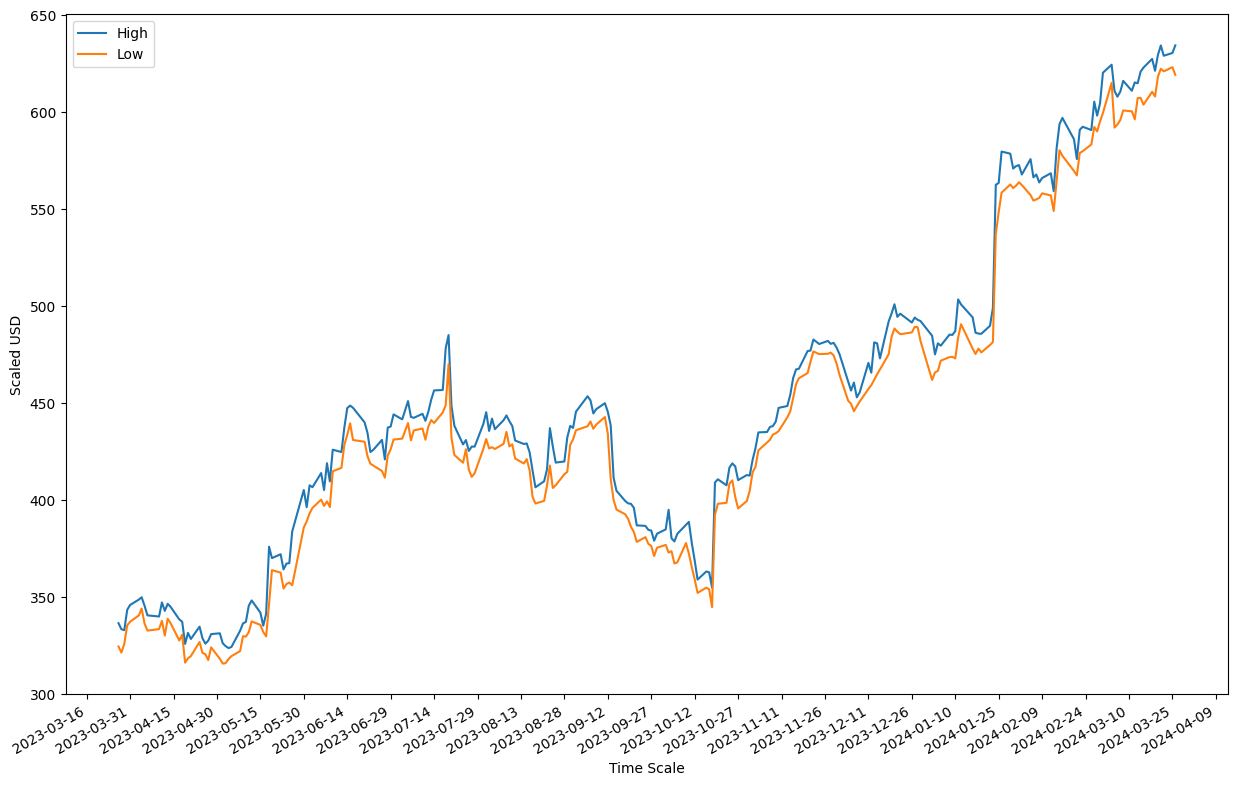

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter ('%Y-%m-%d' ))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stock_data.index.values]

plt.plot(x_dates, stock_data[ 'High'], label='High')
plt.plot(x_dates, stock_data[ 'Low'], label='Low')
plt.xlabel ('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf(). autofmt_xdate()
plt. show()


In [ ]:
y = stock_data['Close']
x = stock_data.drop(['Close'], axis=1)
y

Date
2023-03-27    327.660004
2023-03-28    323.519989
2023-03-29    332.029999
2023-03-30    338.429993
2023-03-31    345.480011
                 ...    
2024-03-20    627.690002
2024-03-21    622.710022
2024-03-22    628.010010
2024-03-25    627.460022
2024-03-26    629.239990
Name: Close, Length: 252, dtype: float64

In [ ]:
from sklearn.preprocessing import minmax_scale, StandardScaler

sc = StandardScaler()

x_fit = sc.fit_transform(x.values)
x_fit = pd.DataFrame(data=x_fit, columns=x.columns, index = x.index )
x_fit

,Open,High,Low,Adj Close,Volume
Date,,,,,
2023-03-27,-1.423619,-1.374927,-1.404369,-1.420353,0.786135
2023-03-28,-1.441860,-1.412857,-1.442896,-1.470905,0.225601
2023-03-29,-1.439044,-1.418571,-1.388121,-1.366992,0.172576
2023-03-30,-1.267896,-1.291650,-1.270324,-1.288844,0.394071
2023-03-31,-1.270589,-1.260649,-1.246936,-1.202759,-0.005077
...,...,...,...,...,...
2024-03-20,2.156064,2.187974,2.213618,2.243212,-0.784509
2024-03-21,2.287058,2.246936,2.262730,2.182403,-0.819090
2024-03-22,2.207604,2.182381,2.246359,2.247120,-0.917113


In [ ]:
def first_split(data, n_steps):
    X, Y = [], []
    for i in range(len(data) - n_steps + 1):
        X.append(data[i:i + n_steps, :-1])
        Y.append(data[i + n_steps - 1, -1])
    return np.array(X), np.array(y)


In [ ]:
X1, y1 = first_split(stock_data.values, n_steps=2)

# Defining train_split ratio
train_split = 0.8

# Calculating the split index
split_idx = int(np.ceil(len(X1) * train_split))

# Extracting date index
date_index = stock_data.index

# Splitting data and date index into train and test sets
X_train, X_test = X1[:split_idx], X1[split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]
X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:]

# Printing shapes of the arrays
print(X1.shape, X_train.shape, X_test.shape, y_test.shape, y_train.shape)


(251, 2, 5) (201, 2, 5) (50, 2, 5) (51,) (201,)


In [ ]:
se = Sequential()

se.add(LSTM(units=32, input_shape=(X_train.shape[1], X_train.shape[2]),))

# Add a Dense output layer with 1 unit (for regression)
se.add(Dense(units=1))

# Compile the model
se.compile(optimizer='adam', loss='mse')

# Display the model architecture
se.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4897 (19.13 KB)
Trainable params: 4897 (19.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = se.fit(X_train, y_train, verbose = 2, epochs=100, batch_size=4, shuffle = False)


Epoch 1/100
51/51 - 3s - loss: 170892.0938 - 3s/epoch - 62ms/step
Epoch 2/100
51/51 - 0s - loss: 170434.6406 - 158ms/epoch - 3ms/step
Epoch 3/100
51/51 - 0s - loss: 170036.4375 - 155ms/epoch - 3ms/step
Epoch 4/100
51/51 - 0s - loss: 169641.8750 - 151ms/epoch - 3ms/step
Epoch 5/100
51/51 - 0s - loss: 169249.2188 - 142ms/epoch - 3ms/step
Epoch 6/100
51/51 - 0s - loss: 168858.0469 - 149ms/epoch - 3ms/step
Epoch 7/100
51/51 - 0s - loss: 168468.0469 - 159ms/epoch - 3ms/step
Epoch 8/100
51/51 - 0s - loss: 168079.0781 - 153ms/epoch - 3ms/step
Epoch 9/100
51/51 - 0s - loss: 167690.9844 - 169ms/epoch - 3ms/step
Epoch 10/100
51/51 - 0s - loss: 167303.7656 - 170ms/epoch - 3ms/step
Epoch 11/100
51/51 - 0s - loss: 166917.3594 - 148ms/epoch - 3ms/step
Epoch 12/100
51/51 - 0s - loss: 166531.7031 - 155ms/epoch - 3ms/step
Epoch 13/100
51/51 - 0s - loss: 166146.8125 - 151ms/epoch - 3ms/step
Epoch 14/100
51/51 - 0s - loss: 165762.6719 - 144ms/epoch - 3ms/step
Epoch 15/100
51/51 - 0s - loss: 165379.1875 -

In [ ]:
predictions = se.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [ ]:
predictions

array([[49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683],
       [49.236683]],

ValueError: x and y must have same first dimension, but have shapes (252,) and (50, 1)

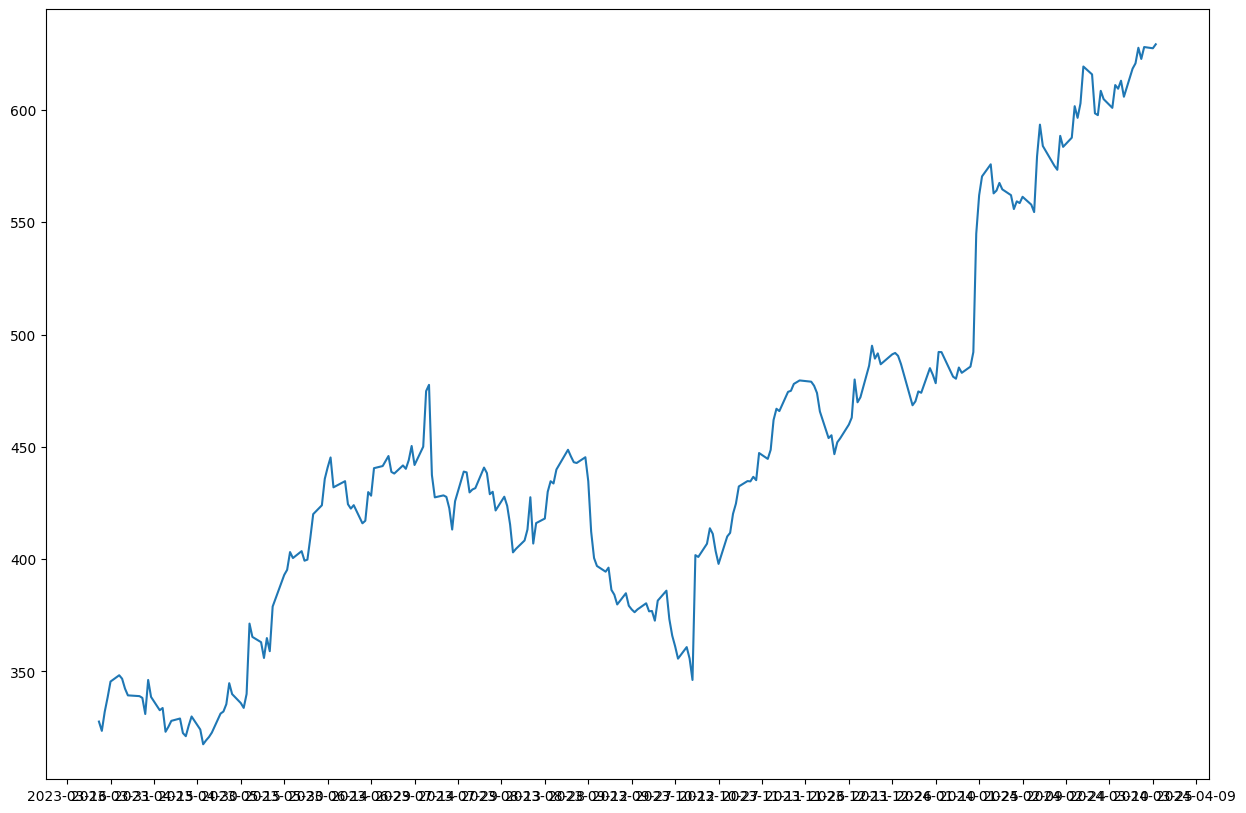

In [ ]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter ('%Y-%m-%d' ))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stock_data.index.values]

plt.plot(x_dates, stock_data['Close'], label='High')
plt.plot(x_dates, predictions, label='Low')
plt.xlabel ('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf(). autofmt_xdate()
plt. show()
